In [1]:
import grape 
import analysis

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import json
import os 
from collections import namedtuple
import re 

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [2]:
output_dir = './output_grape'

In [3]:
def read_json(run, fn):
    with open(os.path.join(output_dir, run, fn+'.json')) as f: 
        data = json.load(f)
    return data


In [4]:
run_names = os.listdir(output_dir)
run_names

['grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE_predictDGNGCN',
 'grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN',
 'grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN_recon',
 'grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE_predictMLP',
 'grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE_predictDGNGCN',
 'grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN',
 'grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN_recon',
 'grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE_predictMLP',
 'grape_100genes_64emb_modelEGCN_EGCN_EGCN_predictMLP',
 'grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE_predictDGNGCN',
 'grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN',
 'grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN_recon',
 'grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE_predictMLP',
 'grape_100genes_Noneemb_modelEGSAGE_EGSAGE_EGSAGE_predictDGNGCN',
 'grape_100genes_Noneemb_modelEGSAGE_EGSAGE_EGSAGE_predictGCN',
 'grape_100genes_Noneemb_modelEGSAGE_EGSAG

In [5]:
run_config_re = r'(?P<ngenes>\d+)genes_(?P<embed_dim>.*)emb_model(?P<model_config>.*)_predict(?P<predict_config>[^_]+)'
run_config = namedtuple('run', ['genes', 'embed_dim', 'model', 'predict', 'recon_loss'])

run_configs = []
for run in run_names: 
    config = re.search(run_config_re, run).groups()
    run_configs.append(run_config(*config, True if '_recon' in run else False))
run_configs = pd.concat([pd.DataFrame({'name': run_names}), pd.DataFrame(run_configs)], axis=1)
run_configs

,name,genes,embed_dim,model,predict,recon_loss
0,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False
1,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,GCN,False
2,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,GCN,True
3,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,MLP,False
4,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False
5,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,GCN,False
6,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,GCN,True
7,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,MLP,False
8,grape_100genes_64emb_modelEGCN_EGCN_EGCN_predi...,100,64,EGCN_EGCN_EGCN,MLP,False
9,grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE...,100,64,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False


In [6]:
metrics_config = namedtuple('metrics', ['epochs', 'final_train_acc', 'max_train_acc', 'final_test_acc', 'max_test_acc'])
metrics = []
for run in run_names: 
    data = read_json(run, 'obj')
    metrics.append(metrics_config(
        data['curves']['epoch'][-1], 
        data['curves']['train_acc'][-1], 
        max(data['curves']['train_acc']), 
        data['curves']['test_acc'][-1], 
        max(data['curves']['test_acc']), 
    ))
metrics = pd.concat([run_configs, pd.DataFrame(metrics)], axis=1)
metrics

,name,genes,embed_dim,model,predict,recon_loss,epochs,final_train_acc,max_train_acc,final_test_acc,max_test_acc
0,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False,2000,55.885422,55.885422,47.530866,47.901237
1,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,GCN,False,2000,53.333336,54.583335,47.160497,47.160497
2,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,GCN,True,2000,41.562504,43.229169,39.629632,42.716050
3,grape_100genes_16emb_modelEGSAGE_EGSAGE_EGSAGE...,100,16,EGSAGE_EGSAGE_EGSAGE,MLP,False,2000,66.666669,67.604172,31.604940,37.283951
4,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False,2000,55.625004,56.770837,47.407410,49.259260
5,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,GCN,False,2000,49.062502,50.520837,46.666670,46.666670
6,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,GCN,True,2000,43.072918,44.114587,41.358027,42.592594
7,grape_100genes_32emb_modelEGSAGE_EGSAGE_EGSAGE...,100,32,EGSAGE_EGSAGE_EGSAGE,MLP,False,2000,65.364587,72.447920,33.456790,34.074077
8,grape_100genes_64emb_modelEGCN_EGCN_EGCN_predi...,100,64,EGCN_EGCN_EGCN,MLP,False,1000,17.291668,20.260417,9.753087,14.691359
9,grape_100genes_64emb_modelEGSAGE_EGSAGE_EGSAGE...,100,64,EGSAGE_EGSAGE_EGSAGE,DGNGCN,False,2000,53.541672,54.635417,46.666670,48.641977


check if embeddings work

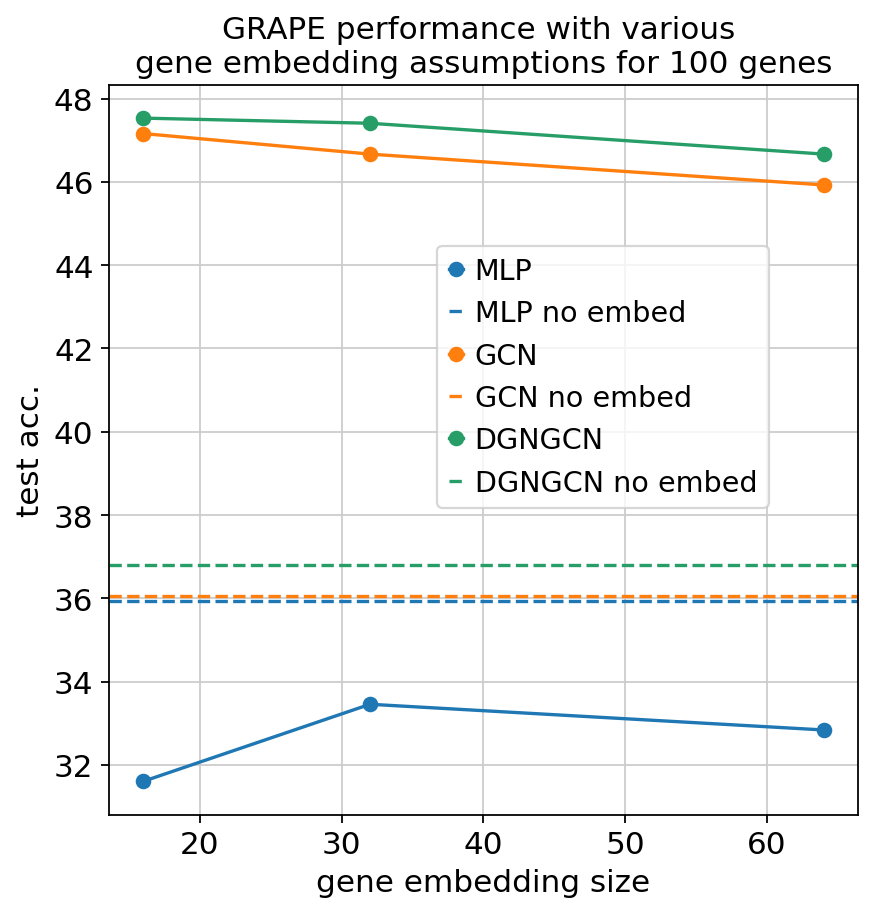

In [7]:
df = metrics.loc[(metrics.genes=='100') & (metrics.model=='EGSAGE_EGSAGE_EGSAGE') & (~metrics.recon_loss)]
fig, ax = plt.subplots(figsize=(6,6))
for predict_model in ['MLP', 'GCN', 'DGNGCN']: 
    _df = df.loc[(metrics.embed_dim != 'None') & (df.predict==predict_model)]
    _x = [int(i) for i in _df.embed_dim]
    # ax.plot(_x, _df.final_train_acc, label=f'{predict_model}')
    l = ax.plot(_x, _df.final_test_acc, label=f'{predict_model}', marker='o')
    _df = df.loc[(metrics.embed_dim == 'None') & (metrics.predict == predict_model)]
    # ax.axhline(_df.final_train_acc.iloc[0], linestyle='--', label=f'{predict_model} no embed')
    ax.axhline(_df.final_test_acc.iloc[0], c=l[0].get_color(), linestyle='--', label=f'{predict_model} no embed')

ax.set_ylabel('test acc.')
ax.set_xlabel('gene embedding size')
ax.set_title('GRAPE performance with various \ngene embedding assumptions for 100 genes')
# ax.legend(bbox_to_anchor=(1.0, 0.7))
ax.legend(bbox_to_anchor=(0.9, 0.6))
# fig.savefig('./plots/grape-embeddings.png', bbox_inches='tight')


model performance with ngenes and embed dim

In [8]:
# from ablation_analysis.ipynb
baselines_ngenes = [ 
    [53.29268292682927, 50.36585235595703, 48.1707305908203, 49.26829528808594],  # 100 genes
    [54.390243902439025, 49.26829528808594, 49.14634323120117, 49.14634323120117],  # 200 genes
    [63.53658536585366, 51.46341323852539, 56.09756088256836, 52.439022064208984],  # 400 genes
    [58.65853658536585, 52.07316970825195, 51.707313537597656, 52.804874420166016],  # 685 genes
]
baselines_ngenes = np.array(baselines_ngenes)

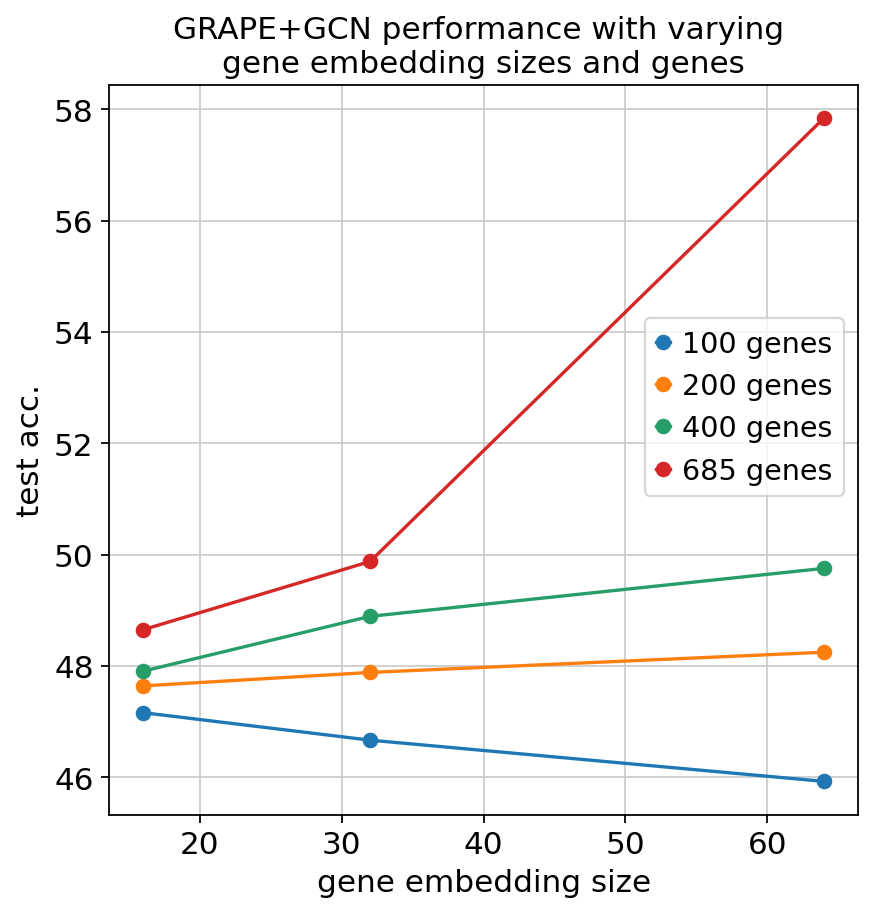

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
predict_model = 'GCN'
df = metrics.loc[(metrics.predict==predict_model) & (metrics.model=='EGSAGE_EGSAGE_EGSAGE') & (~metrics.recon_loss) & (metrics.embed_dim != 'None')]

for b,ngenes in enumerate([100, 200, 400, 685]):
    _df = df.loc[(metrics.genes==str(ngenes))]
    _x = [int(i) for i in _df.embed_dim]
    # ax.plot(_x, _df.final_train_acc, label=f'{predict_model}')
    l = ax.plot(_x, _df.final_test_acc, label=f'{ngenes} genes', marker='o')
    _df = df.loc[(metrics.embed_dim == 'None') & (metrics.predict == predict_model)]
    # ax.axhline(baselines_ngenes[b, 0], c=l[0].get_color(), linestyle='--', label=f'SVM {ngenes} genes') 
    # ax.axhline(baselines_ngenes[b, [1, 2, 3]].max(), c=l[0].get_color(), linestyle=':', label='MLP') 

# ax.set_xbound(10, 70)
# ax.set_ybound(45, 70)
ax.set_ylabel('test acc.')
ax.set_xlabel('gene embedding size')
ax.set_title(f'GRAPE+{predict_model} performance with varying \ngene embedding sizes and genes')
ax.legend(bbox_to_anchor=(1.0, 0.7))
# fig.savefig('./plots/grape-performances.png', bbox_inches='tight')


reconstruction analysis

Text(0.5, 1.0, 'GRAPE+GCN train/test performance over epochs \n with and without reconstruction loss')

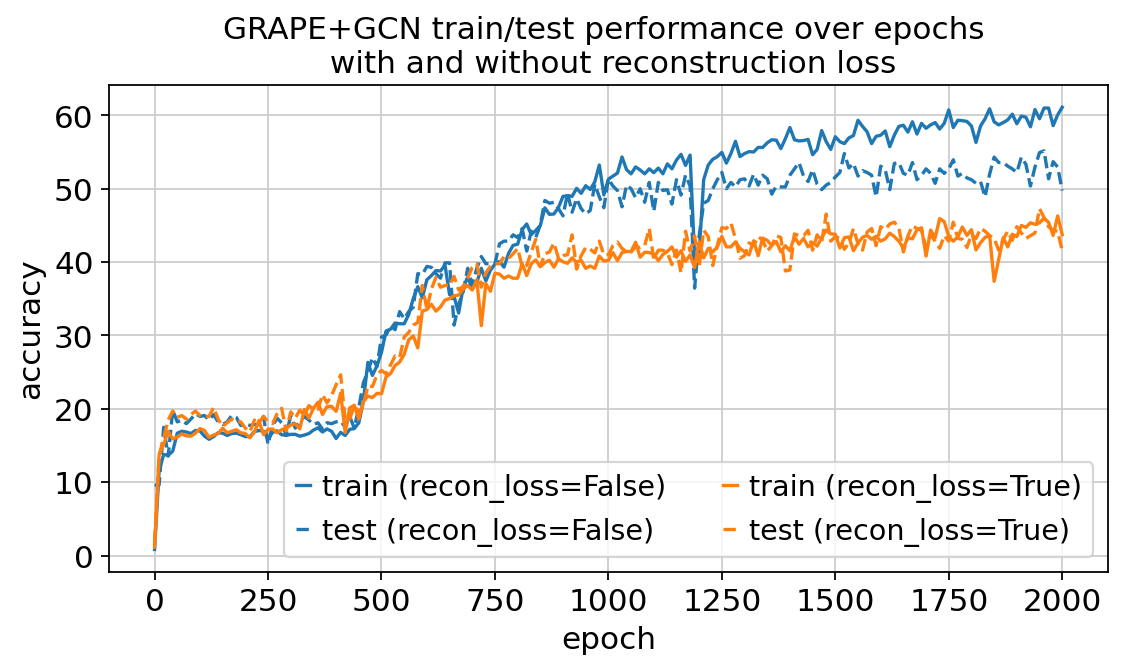

In [10]:
predict_model = 'GCN'
ngenes = '400'  # '685'
embed_dim = 64
df = metrics.loc[
    (metrics.predict==predict_model) & 
    (metrics.model=='EGSAGE_EGSAGE_EGSAGE') & 
    (metrics.genes == str(ngenes)) & 
    (metrics.embed_dim == str(embed_dim))]

# analysis.plot_loss_acc(read_json(df.iloc[0]['name'], 'obj'))

fig, ax = plt.subplots(figsize=(8,4))
for row in df.itertuples():
    recon = row.recon_loss
    obj = read_json(row.name, 'obj')
    epochs = obj['curves']['epoch']
    l = ax.plot(epochs, obj['curves']['train_acc'], label=f'train (recon_loss={recon})')
    ax.plot(epochs, obj['curves']['test_acc'], '--', label=f'test (recon_loss={recon})', c=l[0].get_color())

ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
# ax.legend(bbox_to_anchor=(1, -0.2), ncol=2)
ax.legend(ncol=2)
ax.set_title(f'GRAPE+{predict_model} train/test performance over epochs \n with and without reconstruction loss')
# fig.savefig('./plots/grape-training.png', bbox_inches='tight')

In [11]:
import torch 
from data import preprocess_paul15, get_paul15, data_heterogeneous
from grape import process_data
from GRAPE.uci import uci_data

ngenes = 400
embed_dim = 64

split_sample = 0. 
node_mode = 2 
train_edge = 0.7 
split_by = 'y'
train_y_frac = 0.7 
seed = 0

adata = preprocess_paul15(get_paul15(), n_top_genes=ngenes) 
data = uci_data.load_data(adata, target_col='paul15_clusters_ind', node_mode=node_mode, 
        train_edge=train_edge, split_sample=split_sample, split_by=split_by, train_y=train_y_frac, seed=seed,
        one_hot=True)
data = data_heterogeneous(data, embed_dim)

/home/hbl/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/mnt/c/Users/han13/OneDrive/Documents/MPhil ACS/L45 Representation Learning on Graphs and Networks/project/code/data.py:132: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['paul15_clusters_ind'] = adata.obs.paul15_clusters.replace(cats.to_list(), range(len(cats)))


In [12]:
predict_model = 'GCN'
device = torch.device('cuda')

df = metrics.loc[
    (metrics.predict==predict_model) & 
    (metrics.model=='EGSAGE_EGSAGE_EGSAGE') & 
    (metrics.genes == str(ngenes)) & 
    (metrics.embed_dim == str(embed_dim))]

x, edge_index, y, train_labels, train_edge_index, train_edge_attr, train_y_mask, test_y_mask, n_row, n_col = process_data(data, device=device)
edge_attr = torch.cat([data.get_edge_store(*t)['edge_attr'] for t in data.edge_types], axis=0).clone().detach().to(device)
# edge_attr = torch.cat([edge_attr, edge_attr.flip([1])], axis=0)
target_x = torch.tensor(adata.X).to(device)

ds = []
for recon in [True, False]:
    run = df.loc[df.recon_loss == recon, 'name'].iloc[0]
    model = torch.load(os.path.join(output_dir, run, 'model.pt')).to(device)
    impute_model = torch.load(os.path.join(output_dir, run, 'impute_model.pt')).to(device)


    with torch.no_grad(): 
        p, d = analysis.simulated_dropout_analysis(model, impute_model, 
            target_x, x, train_edge_attr, train_edge_index, edge_index, n_row, n_col)
            # target_x, x, edge_attr, edge_index, edge_index, n_row, n_col)
    ds.append(d)

all y num is 2730, train num is 1918, test num is 812


In [13]:
scgnn_baseline = {
    'cosine': [0.0,
 0.30824971199035645,
 0.44181743264198303,
 0.5459775328636169,
 0.6302515268325806,
 0.7071680426597595], 
 'l1': [0.4483351707458496,
 0.4039296507835388,
 0.35897237062454224,
 0.31398749351501465,
 0.26951029896736145,
 0.22396092116832733], 
 'mse': [
    1.2198262214660645,
    1.0994501113891602,
    0.9746311902999878,
    0.8563347458839417,
    0.7331550717353821,
    0.610256552696228
]
}

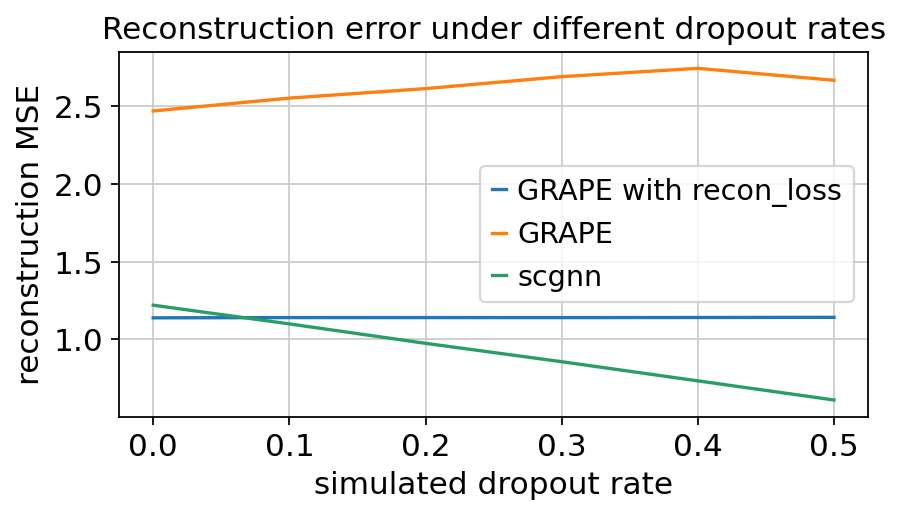

In [16]:
c = 'mse'

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(p, [ms[c+'_median'] for ms in ds[0]], label='GRAPE with recon_loss')
ax.plot(p, [ms[c+'_median'] for ms in ds[1]], label='GRAPE')
ax.plot(p, scgnn_baseline[c], label='scgnn')
ax.set_ylabel('reconstruction MSE')
ax.set_xlabel('simulated dropout rate')
ax.set_title('Reconstruction error under different dropout rates')
ax.legend()
fig.savefig('./plots/grape-reconstruction.png', bbox_inches='tight')

In [19]:
[i['cosine_median'] for i in ds[0]]

[0.40846502780914307,
 0.4072857201099396,
 0.4088183343410492,
 0.40394964814186096,
 0.40401533246040344,
 0.4008447825908661]

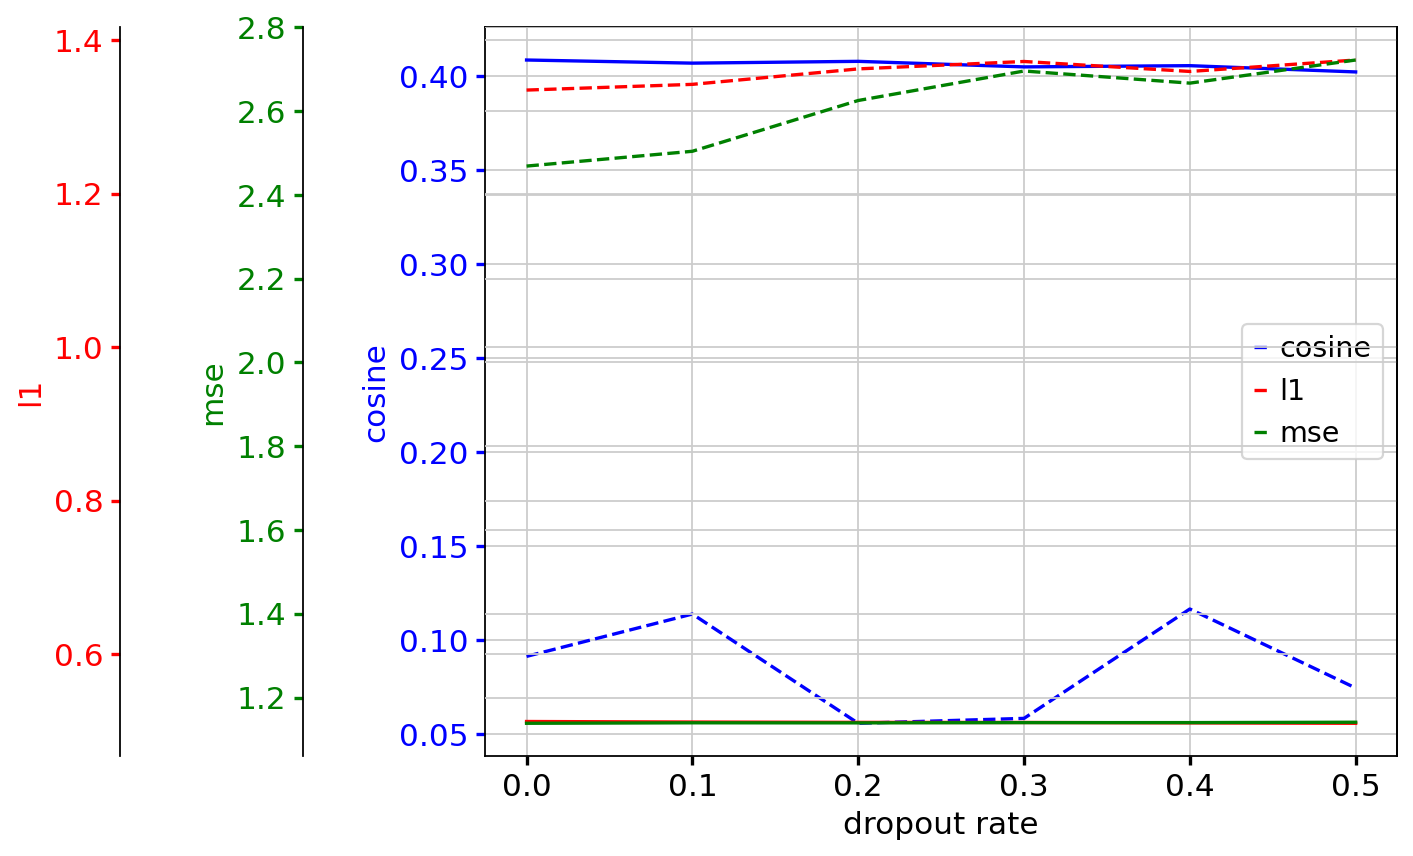

In [ ]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par1.spines["left"].set_position(("axes", -0.4)) 
par2.spines["left"].set_position(("axes", -0.2)) 
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par1)
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(p, [ms['cosine_median'] for ms in ds[0]], 'b-', label='cosine')
p2, = par1.plot(p, [ms['l1_median'] for ms in ds[0]], 'r-', label='l1')
p3, = par2.plot(p, [ms['mse_median'] for ms in ds[0]], 'g-', label='mse')

p1, = host.plot(p, [ms['cosine_median'] for ms in ds[1]], 'b--', label='cosine')
p2, = par1.plot(p, [ms['l1_median'] for ms in ds[1]], 'r--', label='l1')
p3, = par2.plot(p, [ms['mse_median'] for ms in ds[1]], 'g--', label='mse')

# host.set_xlim(0, 2)
# host.set_ylim(0, 2)
# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')

par2.spines["left"].set_visible(True)
par2.yaxis.set_label_position('left')
par2.yaxis.set_ticks_position('left')

host.set_xlabel("dropout rate")
host.set_ylabel("cosine")
par1.set_ylabel("l1")
par2.set_ylabel("mse")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines], loc=5)

plt.show()